## Data Reading

In [86]:
import csv, matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
loan = pd.read_csv("https://docs.google.com/uc?export=download&id=17fohKcXrvJQEYcgqYc33IvsZ6lISsTmu",encoding = 'unicode_escape')
loan

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.00,0.00,"5,863.16","5,833.84",...,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.00,0.00,"1,008.71","1,008.71",...,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,nan,nan,2,0,2956,98.50%,10,f,0.00,0.00,"3,005.67","3,005.67",...,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,nan,10,0,5598,21%,37,f,0.00,0.00,"12,231.89","12,231.89",...,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
4,1075358,1311748,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,"80,000.00",Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.00,nan,15,0,27783,53.90%,38,f,524.06,524.06,"3,513.33","3,513.33",...,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,"1,075.00",36 months,8.07%

In [88]:
data_dict = pd.read_excel("https://docs.google.com/uc?export=download&id=1t_QE0Y9zwqd3KH7ZCogKdgrarE4yRWMr")
data_dict


,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
5,annual_inc_joint,The combined self-reported annual income provi...
6,application_type,Indicates whether the loan is an individual ap...
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/...


In [89]:
pd.set_option('max_rows', 150)
pd.options.display.float_format = "{:,.2f}".format  ## readable numerical

Checking NAs in data

In [90]:
round(100*loan.isna().sum()/len(loan.index),2)

id                                 0.00
member_id                          0.00
loan_amnt                          0.00
funded_amnt                        0.00
funded_amnt_inv                    0.00
term                               0.00
int_rate                           0.00
installment                        0.00
grade                              0.00
sub_grade                          0.00
emp_title                          6.19
emp_length                         2.71
home_ownership                     0.00
annual_inc                         0.00
verification_status                0.00
issue_d                            0.00
loan_status                        0.00
pymnt_plan                         0.00
url                                0.00
desc                              32.58
purpose                            0.00
title                              0.03
zip_code                           0.00
addr_state                         0.00
dti                                0.00


## Dropping no information fields
Removing columns with more then 90% Null values

In [91]:
loan = loan.loc[:,round(100*loan.isna().sum()/len(loan.index),2)<90]
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,nan,3,0,13648,83.70%,9,f,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,nan,3,0,1687,9.40%,4,f,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,nan,2,0,2956,98.50%,10,f,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,10,0,5598,21%,37,f,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
4,1075358,1311748,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,"80,000.00",Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.00,15,0,27783,53.90%,38,f,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,May-16,67.79,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,"1,075.00",36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,"110,000.00",Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.00,13,0,7274,13.10%,40,f,0.00,0.00,"2,822.97","1,213.88","2,500.00",322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,nan,1,INDIVIDUAL,0,nan,0,nan,nan
39713,90665,90607,8500,8500,875.00,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,"18,000.00",Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.00,6,0,8847,26.90%,9,f,0.00,0.00,"9,913.49","1,020.51","8,500.00","1,413.49",0.00,0.00,0.00,Jul-10,281.94,Jul-10,nan,1,INDIVIDUAL,0,nan,0,nan,nan
39714,90395,90390,5000,5000,"1,325.00",36 mo

In [92]:
round(100*loan.isna().sum()/len(loan.index),2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
desc                         32.58
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
mths_since_last_deli

In [93]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

## Univariate Analysis of the target variable

In [94]:
loan.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

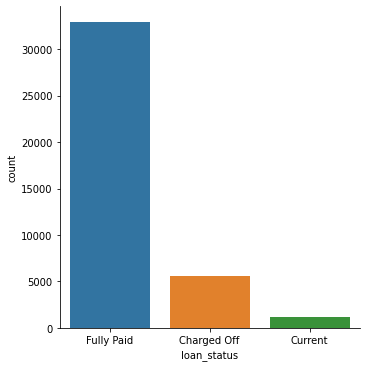

In [95]:
ax = sns.catplot(data=loan, kind='count', x="loan_status")
plt.show()

The target variable - Skewed Nominal variable .

Dropping data with "Current" as loan status, since it doesn't add any information

In [96]:
loan = loan[loan.loan_status!="Current"]

In [97]:
# Deafult rate
round(sum(loan["loan_status"]=="Charged Off")/loan.shape[0]*100, 2)

14.59

Lets consider folllowing business and domain driven variables:

loan_amnt,
term,
int_rate,
grade,
sub_grade,
emp_title,
emp_length,
home_ownership,
annual_inc,
verification_status,
purpose,
open_acc,
dti,
issue_d,
application_type,
pub_rec_bankruptcies,
pub_rec,
tax_liens,
total_acc,
title,
desc,
policy_code,


Ignoring customer behavioural columns (eg.delinq_2yrs) since they are not captured while customer submits loan application; those behavious are captured over the time post application submission.

[Grade details](https://www.lendingclub.com/foliofn/rateDetail.action)




In [98]:
loan = loan[["id","loan_status","loan_amnt","term","int_rate","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","purpose","open_acc","dti","issue_d","application_type","pub_rec_bankruptcies","pub_rec","tax_liens","total_acc","title","desc","policy_code"]]

In [99]:
round(100*loan.isna().sum()/len(loan.index),2)

id                      0.00
loan_status             0.00
loan_amnt               0.00
term                    0.00
int_rate                0.00
grade                   0.00
sub_grade               0.00
emp_title               6.19
emp_length              2.68
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
purpose                 0.00
open_acc                0.00
dti                     0.00
issue_d                 0.00
application_type        0.00
pub_rec_bankruptcies    1.81
pub_rec                 0.00
tax_liens               0.10
total_acc               0.00
title                   0.03
desc                   32.47
policy_code             0.00
dtype: float64

In [100]:
# sum(loan.isna().sum(axis=1)>5)

## Handling missing values

In [101]:
loan.emp_title.value_counts()

US Army                        131
Bank of America                107
IBM                             65
AT&T                            57
Kaiser Permanente               56
                              ... 
Louisville Metro Government      1
SSE Inc                          1
icon clinical research           1
Fairfax Imaging  Inc.            1
City of Newburgh                 1
Name: emp_title, Length: 28027, dtype: int64

In [102]:
loan['emp_title'].mode()[0]  # imputing by mode "US Army"
loan.emp_title.fillna(loan['emp_title'].mode()[0], inplace=True)

In [103]:
loan.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [104]:
loan.emp_length.fillna(loan['emp_length'].mode()[0], inplace=True) # imputing by mode "10+ years"

In [105]:
loan.pub_rec_bankruptcies.value_counts()

0.00    36238
1.00     1637
2.00        5
Name: pub_rec_bankruptcies, dtype: int64

In [106]:
loan.pub_rec_bankruptcies.fillna(loan['pub_rec_bankruptcies'].mode()[0], inplace=True) # imputing by mode "0"

In [107]:
loan.tax_liens.value_counts() 

0.00    38538
Name: tax_liens, dtype: int64

In [108]:
# del loan["tax_liens"] # dropping since no information content
loan.drop("tax_liens", axis = 1, inplace=True)

In [109]:
loan.title.str.lower().value_counts()

debt consolidation                         2948
debt consolidation loan                    1752
personal loan                               958
consolidation                               699
home improvement                            526
                                           ... 
kentucky                                      1
p.t. in need of debt consolidation loan       1
boat money                                    1
will pay back                                 1
loan for refinancing - solid investment       1
Name: title, Length: 17408, dtype: int64

Imputing NAs with mode

In [110]:
loan.title.fillna(loan['title'].mode()[0], inplace=True) # imputing by mode "debt consolidation"

In [111]:
loan.desc.str.lower().value_counts()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       209
debt consolidation                                                                                                                           

Dropping desc since >30% rows have no information, and most of this information is already captured by the field title

In [112]:
# del loan["desc"] 
loan.drop("desc", axis = 1,inplace = True)

## Data Manipulation
A data driven field needs to be created from title to use the information for insights.

In [113]:
loan["derivedTitle"] = loan.title.str.lower()

In [114]:
sum(loan["derivedTitle"].str.contains("consolidat"))

9779

In [115]:
%load_ext google.colab.data_table
pd.DataFrame(loan.derivedTitle[loan["derivedTitle"].str.contains("consolidat")].value_counts())

,derivedTitle
debt consolidation,2959
debt consolidation loan,1752
consolidation,699
credit card consolidation,474
consolidation loan,335
...,...
consolidate vespa & credit cards,1
consolidate high interest loan,1
seeking to consolidate high interest deb,1
consolidation loan / lower % rate,1


In [116]:
loan.derivedTitle[loan["derivedTitle"].str.contains("consolidat")] = "consolidation"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [117]:
pd.DataFrame(loan.derivedTitle.value_counts())

,derivedTitle
consolidation,9779
personal loan,958
home improvement,526
personal,524
credit card loan,341
...,...
bye bye credit cards!,1
sell this house loan,1
bofa/mc,1
bills done,1


Similarly manually clustering other keywords

In [118]:
loan.derivedTitle[loan["derivedTitle"].str.contains("personal")] = "personal"
loan.derivedTitle[loan["derivedTitle"].str.contains("home|house|roof")] = "home" #regex
loan.derivedTitle[loan["derivedTitle"].str.contains("credit card|cc")] = " credit card"
loan.derivedTitle[loan["derivedTitle"].str.contains("wedding|engagement|ring")] = "marriage"
loan.derivedTitle[loan["derivedTitle"].str.contains("car|bike|motorcycle")] = "vehicle"
loan.derivedTitle[loan["derivedTitle"].str.contains("medical|surgery")] = "medical"
loan.derivedTitle[loan["derivedTitle"].str.contains("business|capital")] = "business"
loan.derivedTitle[loan["derivedTitle"].str.contains("tax")] = "tax"
loan.derivedTitle[loan["derivedTitle"].str.contains("pool")] = "swimming pool"
pd.DataFrame(loan.derivedTitle.value_counts())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

,derivedTitle
consolidation,9779
vehicle,4983
home,2135
personal,1966
marriage,1085
...,...
travel expenses,1
sooner,1
hard working dad's financial freedom loan,1
7.2k credit refi,1


In [119]:
# del loan["title"]  ## dropping for convenience
loan.drop("title", axis = 1,inplace=True)

In [120]:
round(100*loan.isna().sum()/len(loan.index),2)

id                     0.00
loan_status            0.00
loan_amnt              0.00
term                   0.00
int_rate               0.00
grade                  0.00
sub_grade              0.00
emp_title              0.00
emp_length             0.00
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
purpose                0.00
open_acc               0.00
dti                    0.00
issue_d                0.00
application_type       0.00
pub_rec_bankruptcies   0.00
pub_rec                0.00
total_acc              0.00
policy_code            0.00
derivedTitle           0.00
dtype: float64

In [121]:
loan["int_rate"] = loan.int_rate.apply(lambda x : pd.to_numeric(x.split("%")[0]))

In [122]:
loan["term"] = loan.term.apply(lambda x :  36 if "36" in x else 60 if "60" in x else "-")

In [123]:
loan["emp_length"] = pd.to_numeric(loan.emp_length.str.replace("[years|year|<|+| ]","",regex=True)) # sanitizing

In [124]:
loan.issue_d.value_counts()

Nov-11    2062
Dec-11    2042
Oct-11    1941
Sep-11    1913
Aug-11    1798
Jul-11    1745
Jun-11    1728
May-11    1609
Apr-11    1559
Mar-11    1442
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
Aug-08      71
May-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64

Manupulating issue_date type and creating **data driven variables** out of it

In [125]:
# loan[["month","year"]] = loan.issue_d.str.split("-", expand=True)
# loan[["month","year"]]

In [126]:
loan["issue_d"] = pd.to_datetime(loan.issue_d,format="%b-%y")
loan["issue_d"]

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

In [127]:
loan["month"] = loan.issue_d.dt.month
loan["year"] = loan.issue_d.dt.year
loan[["month","year"]]

,month,year
0,12,2011
1,12,2011
2,12,2011
3,12,2011
5,12,2011
...,...,...
39712,7,2007
39713,7,2007
39714,7,2007
39715,7,2007


Converting target variable to integer (convenient for ploting methods,)

In [128]:
loan['loan_status'] = loan['loan_status'].apply(lambda x: 0 if x== 'Fully Paid' else 1) # 1 mean defaulted

# Converting loan_status to integer type
loan['loan_status'] =loan['loan_status']. apply( lambda x: pd.to_numeric(x))

## Univariate Analysis

Univariate analysis of loan_amnt - Ratio type variable (continuous)

In [129]:
loan.loan_amnt.describe()

count   38,577.00
mean    11,047.03
std      7,348.44
min        500.00
25%      5,300.00
50%      9,600.00
75%     15,000.00
max     35,000.00
Name: loan_amnt, dtype: float64

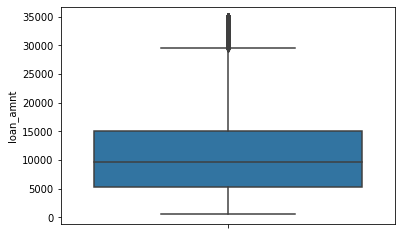

In [130]:
sns.boxplot(data=loan, y = "loan_amnt")
plt.show()

Difference in mean-median, 75% quantile - max suggests moderate outliers.

**Binning the continous variable loan amount** to create another data driven variable

In [131]:
loan["loan_amnt_bins"] = loan.loan_amnt.apply(lambda x : "low" if x <= 5000 else "medium" if (x>5000 and x<=15000) else "hi" if (x>15000 and x<= 20000) else "very_hi")
loan["loan_amnt_bins"]

0           low
1           low
2           low
3        medium
5           low
          ...  
39712       low
39713    medium
39714       low
39715       low
39716    medium
Name: loan_amnt_bins, Length: 38577, dtype: object

Defining user defined methods for convenience

In [132]:
def segmented_univariate_plot(category, axi = None):
  if axi is not None:
    plt.figure(figsize= (16,16))
  sns.barplot(x = category, y = "loan_status", data = loan, ax = axi)
  if axi is None:
    plt.show()

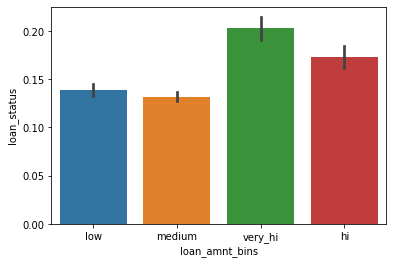

In [133]:
segmented_univariate_plot('loan_amnt_bins')

**This shows very_hi loans (worth > 20000) are likely to be defaulted**

In [134]:
sum((loan.loan_amnt_bins=="low") & (loan.loan_status==1))/sum(loan.loan_amnt_bins=="low")

0.13872466216216217

**Default Rate**

In [135]:
aggregated = pd.pivot_table(loan, index = "loan_amnt_bins", values = "loan_status",aggfunc=[np.sum,len, lambda x : np.sum(x)/len(x) ])
aggregated

,sum,len,<lambda>
,loan_status,loan_status,loan_status
loan_amnt_bins,,,
hi,751,4349,0.17
low,1314,9472,0.14
medium,2697,20485,0.13
very_hi,865,4271,0.20


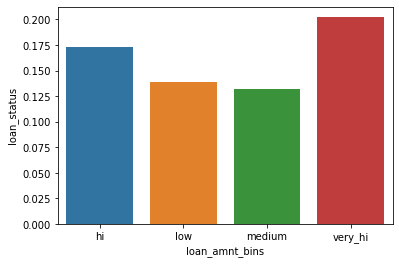

In [136]:
sns.barplot(x = "loan_amnt_bins", y="loan_status" ,data = aggregated["<lambda>"].reset_index())
plt.show()

In [137]:
## method to plot percentage rate, actaully same as segmented_univariate_plot
def univarite_category_rate_plot_binary_target(category):
  aggregated = pd.pivot_table(loan, index = category, values = "loan_status",aggfunc=[np.sum,len, lambda x : np.sum(x)/len(x) ])
  sns.barplot(x = category, y="loan_status" ,data = aggregated["<lambda>"].reset_index())
  plt.show()

In [138]:
loan.loan_amnt_bins.value_counts()

medium     20485
low         9472
hi          4349
very_hi     4271
Name: loan_amnt_bins, dtype: int64

Binning interest rates

In [139]:
loan["int_rate"].describe()

count   38,577.00
mean        11.93
std          3.69
min          5.42
25%          8.94
50%         11.71
75%         14.38
max         24.40
Name: int_rate, dtype: float64

In [140]:
loan["int_rate_bins"] = loan.int_rate.apply(lambda x : "low" if x <= 8 else "medium" if (x>8 and x<=14) else "hi")
loan["int_rate_bins"]

0        medium
1            hi
2            hi
3        medium
5           low
          ...  
39712    medium
39713    medium
39714    medium
39715       low
39716    medium
Name: int_rate_bins, Length: 38577, dtype: object

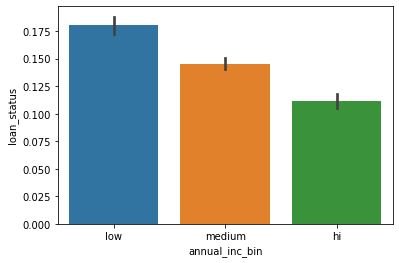

In [141]:
loan["annual_inc_bin"] = loan.annual_inc.apply(lambda x : "low" if x <= 40000 else "medium" if (x>40000 and x<=82000) else "hi")
segmented_univariate_plot("annual_inc_bin")

**Wealthy borrowers are less likely to default**

In [142]:
loan["dti"].describe()

count   38,577.00
mean        13.27
std          6.67
min          0.00
25%          8.13
50%         13.37
75%         18.56
max         29.99
Name: dti, dtype: float64

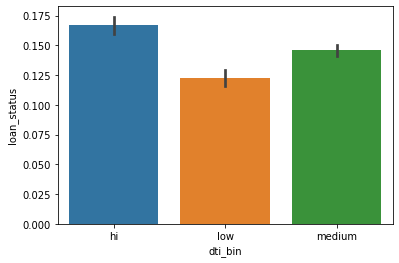

In [143]:
loan["dti_bin"] = loan.dti.apply(lambda x : "low" if x <= 8 else "medium" if (x>8 and x<=18) else "hi")
segmented_univariate_plot("dti_bin")

**People with low debt to income ratio are more likely to default**

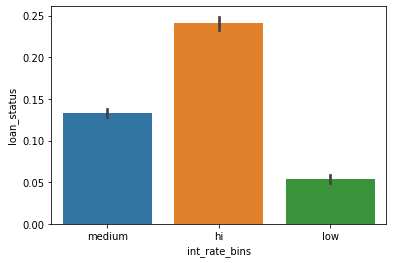

In [144]:
segmented_univariate_plot("int_rate_bins")

**Clearly shows more the interest rates , higher is the loan default probability.**

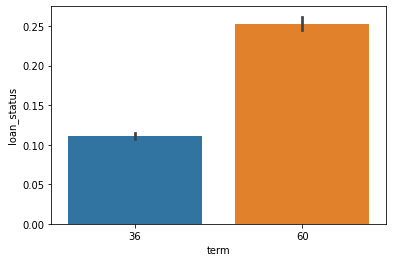

In [145]:
segmented_univariate_plot("term")

**This shows long term loans are more likely to be defaulted**

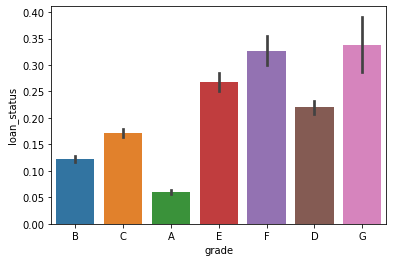

In [146]:
segmented_univariate_plot("grade")

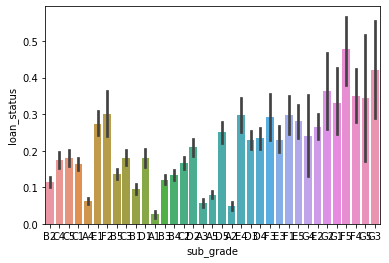

In [147]:
segmented_univariate_plot("sub_grade")

**Poor the grade more likely is the loan to be deafulted**

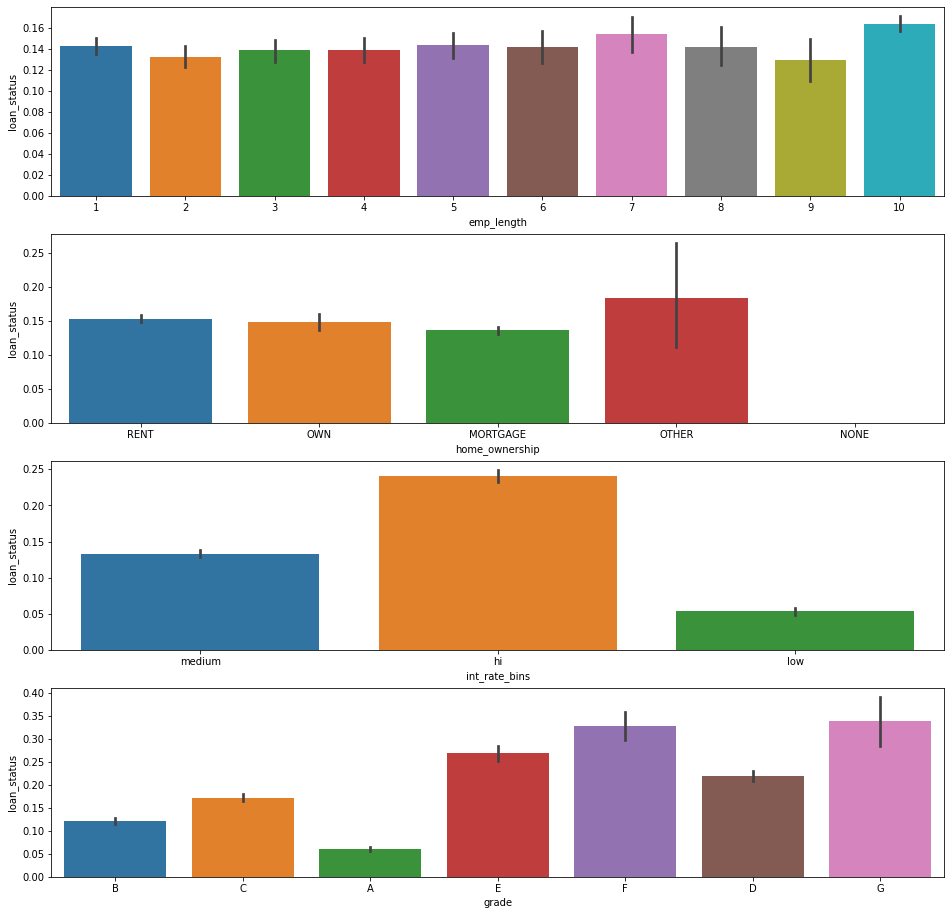

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

In [148]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1,figsize=(16,16))
segmented_univariate_plot("emp_length", axi = ax1)
segmented_univariate_plot("home_ownership", axi = ax2)
segmented_univariate_plot("int_rate_bins", axi = ax3)
segmented_univariate_plot("grade", axi = ax4)
# segmented_univariate_plot("application_type", axi = ax5)
# segmented_univariate_plot("month", axi = ax6)
# segmented_univariate_plot("year", axi = ax7)
# segmented_univariate_plot("policy_code", axi = ax8)
# segmented_univariate_plot("pub_rec", axi = ax9)
# segmented_univariate_plot("total_acc", axi = ax10)
# segmented_univariate_plot("open_acc", axi = ax11)
# segmented_univariate_plot("verification_status", axi = ax12)
# segmented_univariate_plot("pub_rec_bankruptcies", axi = ax13)
# segmented_univariate_plot("emp_title", axi = ax3)
# segmented_univariate_plot("purpose", axi = ax4)
plt.show()

*  **Those with 7 years of work experiance are most likely to default.**
*  **Interestingly, people who own a house are equally likely to default then those who are tenants**

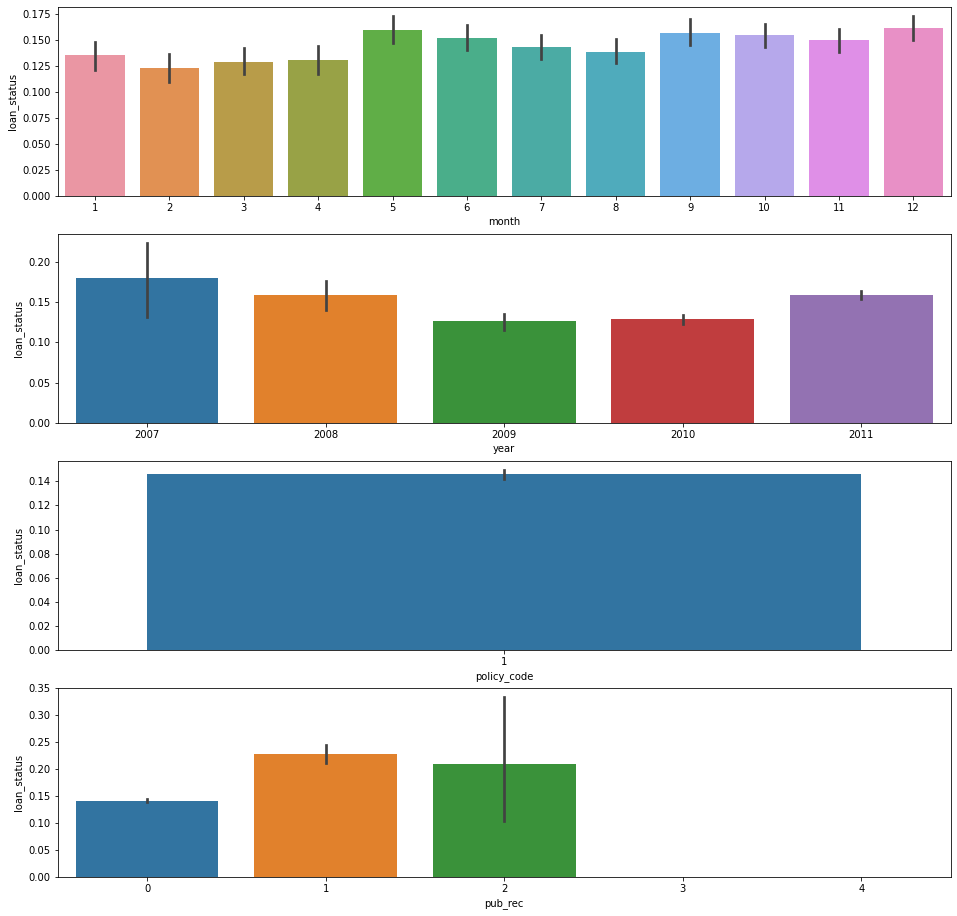

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

In [149]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1,figsize=(16,16))
# segmented_univariate_plot("emp_length", axi = ax1)
# segmented_univariate_plot("home_ownership", axi = ax2)
# segmented_univariate_plot("int_rate_bins", axi = ax3)
# segmented_univariate_plot("grade", axi = ax4)
# segmented_univariate_plot("application_type", axi = ax5)
segmented_univariate_plot("month", axi = ax1)
segmented_univariate_plot("year", axi = ax2)
segmented_univariate_plot("policy_code", axi = ax3)
segmented_univariate_plot("pub_rec", axi = ax4)
# segmented_univariate_plot("total_acc", axi = ax10)
# segmented_univariate_plot("open_acc", axi = ax11)
# segmented_univariate_plot("verification_status", axi = ax12)
# segmented_univariate_plot("pub_rec_bankruptcies", axi = ax13)
# segmented_univariate_plot("emp_title", axi = ax3)
# segmented_univariate_plot("purpose", axi = ax4)
plt.show()

*  **Loans issued in the month of December, May and September (in order) are most likely to be defaulted wrt to other months.**
*  **Over the period of time 2007-2010 , default rate has been decreasing gradually except in 2011, where it has suddenly increased.** 
*  **Those with derogatory public records are more likely to default**


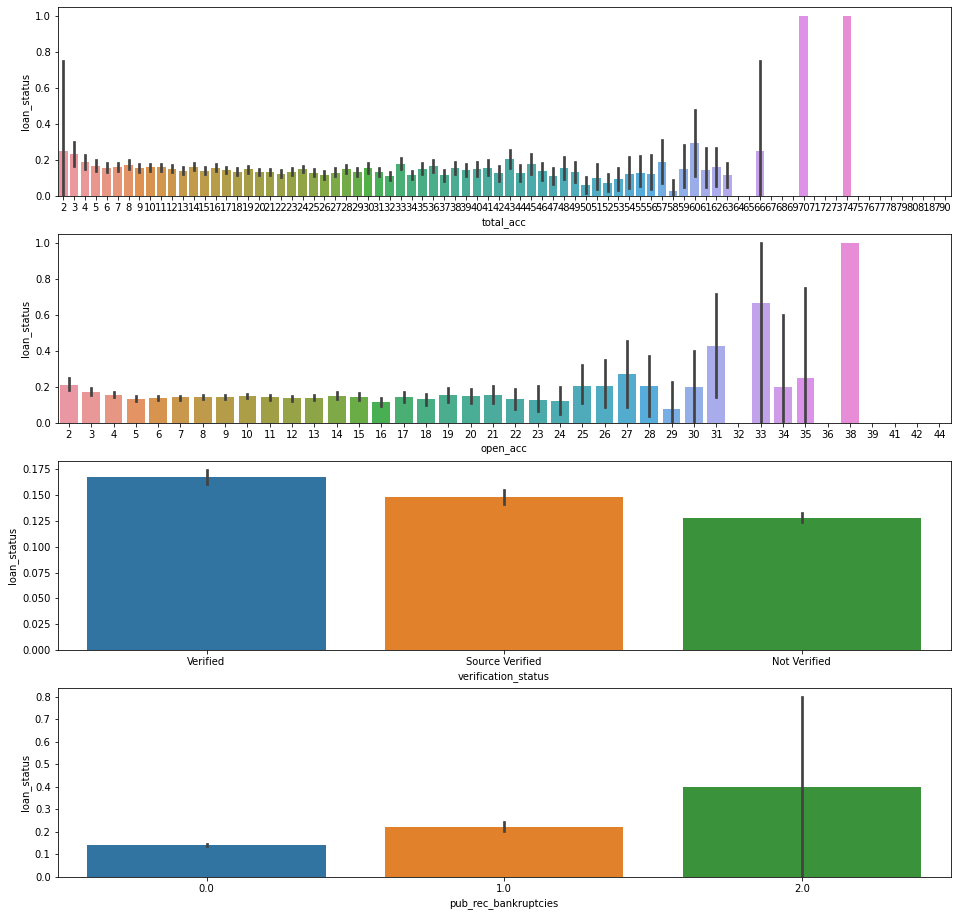

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

In [150]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1,figsize=(16,16))
# segmented_univariate_plot("emp_length", axi = ax1)
# segmented_univariate_plot("home_ownership", axi = ax2)
# segmented_univariate_plot("int_rate_bins", axi = ax3)
# segmented_univariate_plot("grade", axi = ax4)
# segmented_univariate_plot("application_type", axi = ax5)
# segmented_univariate_plot("month", axi = ax6)
# segmented_univariate_plot("year", axi = ax7)
# segmented_univariate_plot("policy_code", axi = ax8)
# segmented_univariate_plot("pub_rec", axi = ax9)
segmented_univariate_plot("total_acc", axi = ax1)
segmented_univariate_plot("open_acc", axi = ax2)
segmented_univariate_plot("verification_status", axi = ax3)
segmented_univariate_plot("pub_rec_bankruptcies", axi = ax4)
# segmented_univariate_plot("emp_title", axi = ax3)
# segmented_univariate_plot("purpose", axi = ax4)
plt.show()

*  **Those with public record bankruptcies are more likely to default**
*  **Those with extremely high number of credit lines in their credit file are likely to default**
*  **Interestingly, verified source of income borrowers default more relative to unverified**

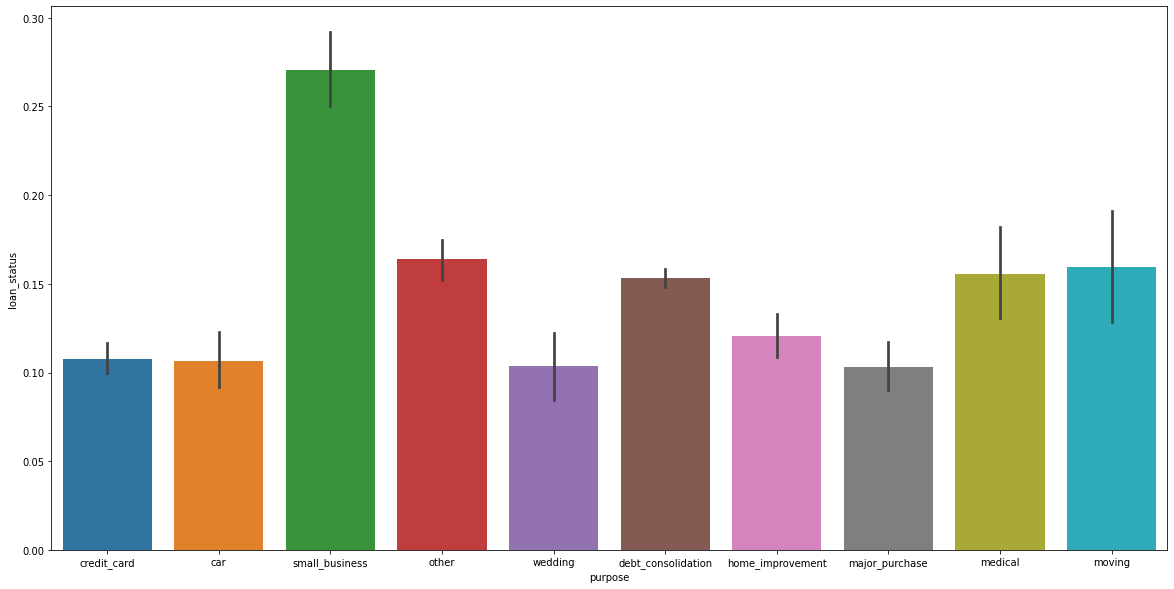

In [151]:
## for plotting convenience plot only top n classes
plt.figure(figsize= (20,10))
sns.barplot(x = "purpose", y = "loan_status", data = loan[loan.purpose.isin(loan.purpose.value_counts().iloc[:10].index.tolist())])
plt.show()



**People borrowing for small businesses are more probable to default**

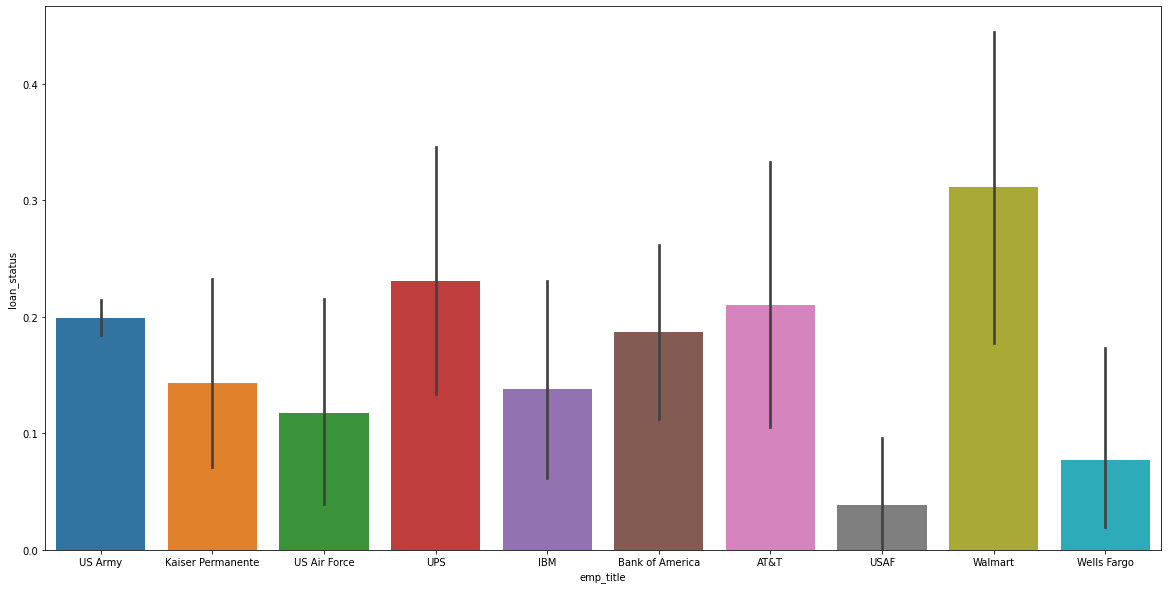

In [152]:
## for plotting convenience plot only top n classes
plt.figure(figsize= (20,10))
sns.barplot(x = "emp_title", y = "loan_status", data = loan[loan.emp_title.isin(loan.emp_title.value_counts().iloc[:10].index.tolist())])
plt.show()



**Walmart employes are most likely to default**

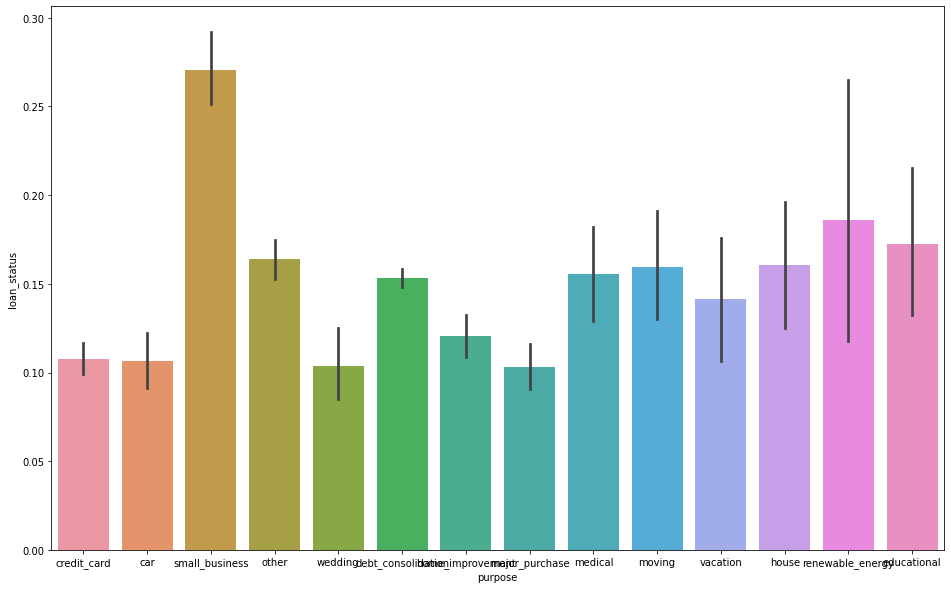

<Figure size 1152x1152 with 0 Axes>

In [153]:
fig, (ax1) = plt.subplots(1, 1,figsize=(16,10))
segmented_univariate_plot("purpose",axi=ax1)
plt.show()


**People borrowing for small businesses**

## Bivariate Analysis

In [154]:
def segmented_bivariate_plot(category, segment): ## hue - pupoer, cat - term
  sns.barplot(x = category, y = "loan_status", hue = segment, data = loan)
  plt.show()

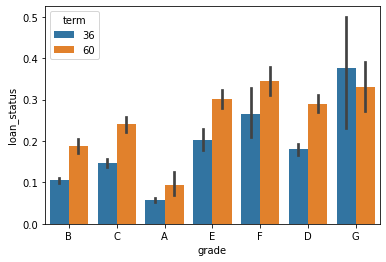

In [155]:
segmented_bivariate_plot("grade","term")

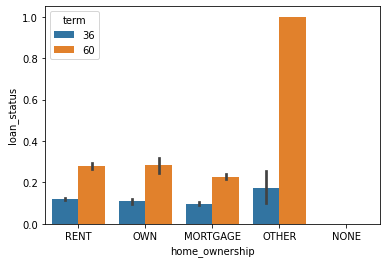

In [156]:
segmented_bivariate_plot("home_ownership","term")

### Correlations

In [157]:
corr = loan.corr()['loan_status'].sort_values()
corr

annual_inc             -0.04
total_acc              -0.02
open_acc               -0.01
emp_length              0.02
year                    0.02
month                   0.02
id                      0.04
dti                     0.05
pub_rec_bankruptcies    0.05
pub_rec                 0.05
loan_amnt               0.06
term                    0.17
int_rate                0.21
loan_status             1.00
policy_code              nan
Name: loan_status, dtype: float64

In [158]:
# sns.heatmap(corr, 
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values)
# plt.show()

Confirms that interest rates and term are positively correlated to loan status.

## Important predictors

Lets define predictor importance to be standard deviation across segmented default rate

In [159]:
def predictor_importance(col):
  p_i = pd.DataFrame(index = range(len(col)),columns = ["col","std"])
  for i in range(len(col)):
    p_i.loc[i,"col"] = col[i]
    p_i.loc[i,"std"] = pd.pivot_table(loan, index = col[i], values = "loan_status",aggfunc=[np.sum,len, lambda x : np.sum(x)/len(x) ])["<lambda>"].loan_status.std()
  return p_i


In [160]:
predictor_importance(["annual_inc","dti","pub_rec_bankruptcies","pub_rec", "total_acc",  "policy_code",  "derivedTitle","emp_title","purpose","loan_amnt_bins","int_rate_bins","term","grade","sub_grade","emp_length","home_ownership","verification_status","month","year","application_type"])

,col,std
0,annual_inc,0.32
1,dti,0.14
2,pub_rec_bankruptcies,0.13
3,pub_rec,0.11
4,total_acc,0.15
5,policy_code,NaN
6,derivedTitle,0.34
7,emp_title,0.35
8,purpose,0.04
9,loan_amnt_bins,0.03


**Most important are emp_title, title, annual_inc , total_acc, dti,  pub_rec_bankruptcies/pub_rec, grade/subgrade, term, int_rate, home_ownership**

In [161]:
loan

,id,loan_status,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,open_acc,dti,issue_d,application_type,pub_rec_bankruptcies,pub_rec,total_acc,policy_code,derivedTitle,month,year,loan_amnt_bins,int_rate_bins,annual_inc_bin,dti_bin
0,1077501,0,5000,36,10.65,B,B2,US Army,10,RENT,"24,000.00",Verified,credit_card,3,27.65,2011-12-01,INDIVIDUAL,0.00,0,9,1,computer,12,2011,low,medium,low,hi
1,1077430,1,2500,60,15.27,C,C4,Ryder,1,RENT,"30,000.00",Source Verified,car,3,1.00,2011-12-01,INDIVIDUAL,0.00,0,4,1,vehicle,12,2011,low,hi,low,low
2,1077175,0,2400,36,15.96,C,C5,US Army,10,RENT,"12,252.00",Not Verified,small_business,2,8.72,2011-12-01,INDIVIDUAL,0.00,0,10,1,business,12,2011,low,hi,low,medium
3,1076863,0,10000,36,13.49,C,C1,AIR RESOURCES BOARD,10,RENT,"49,200.00",Source Verified,other,10,20.00,2011-12-01,INDIVIDUAL,0.00,0,37,1,personel,12,2011,medium,medium,medium,hi
5,1075269,0,5000,36,7.90,A,A4,Veolia Transportaton,3,RENT,"36,000.00",Source Verified,wedding,9,11.20,2011-12-01,INDIVIDUAL,0.00,0,12,1,marriage,12,2011,low,low,low,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,0,2500,36,8.07,A,A4,FiSite Research,4,MORTGAGE,"110,000.00",Not Verified,home_improvement,13,11.33,2007-07-01,INDIVIDUAL,0.00,0,40,1,home,7,2007,low,medium,hi,medium
39713,90665,0,8500,36,10.28,C,C1,"Squarewave Solutions, Ltd.",3,RENT,"18,000.00",Not Verified,credit_card,6,6.40,2007-07-01,INDIVIDUAL,0.00,0,9,1,vehicle,7,2007,medium,medium,low,low
39714,90395,0,5000,36,8.07,A,A4,US Army,1,MORTGAGE,"100,000.00",Not Verified,debt_consolidation,11,2.30,2007-07-01,INDIVIDUAL,0.00,0,20,1,consolidation,7,2007,low,medium,hi,low
39715,90376,0,5000,36,7.43,A,A2,US Army,1,MORTGAGE,"200,000.00",Not Verified,other,17,3.72,2007-07-01,INDIVIDUAL,0.00,0,26,1,jal loan,7,2007,low,low,hi,low


## Correlation Pair Plot

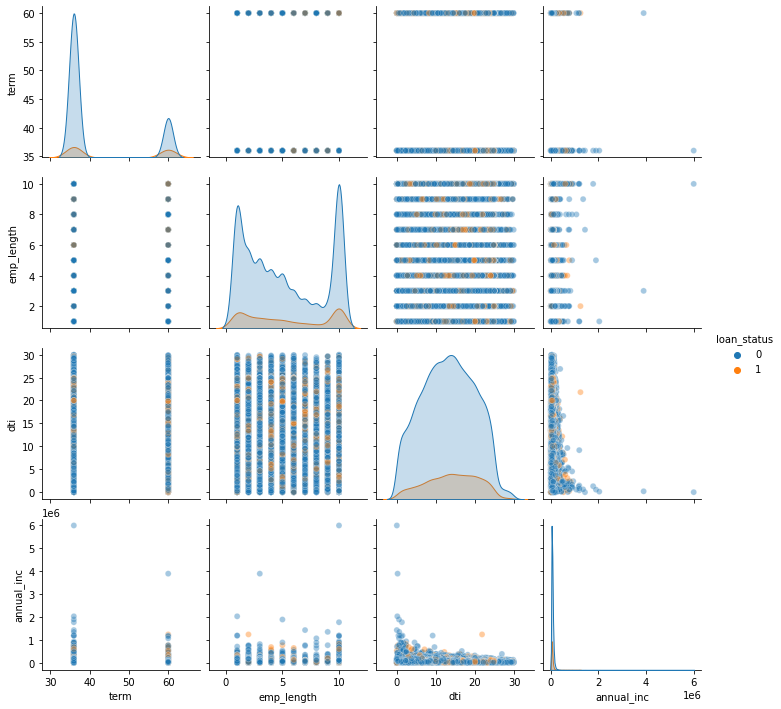

In [162]:
sns.pairplot(loan[["term","emp_length","dti","grade","home_ownership","annual_inc","loan_status"]], hue = 'loan_status',plot_kws = {'alpha': 0.4})
plt.show()

**Those with lesser dti are more likely to default**

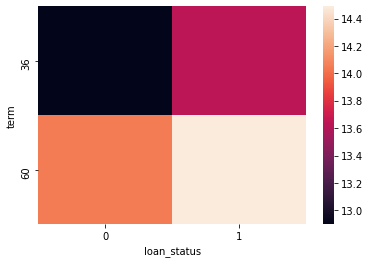

In [163]:
sns.heatmap(pd.pivot_table(loan, index = "term", values = "dti", columns = "loan_status"))

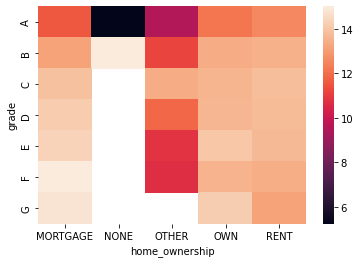

In [164]:
sns.heatmap(pd.pivot_table(loan, index = "grade", values = "dti", columns = "home_ownership"))

## Conclusion and Recommendation

Most important predictor are emp_title, title, annual_inc , total_acc, dti, pub_rec_bankruptcies/pub_rec, grade/subgrade, term, int_rate. Default rate is greater for:

*  Very hi worth loans (worth > 20000)
*  Borrowers with less income 
*  More the interest rates 
*  long term loans 
*  Poor grades 
*  Loans issued in the month of December, May and September (in order) are most likely to be defaulted wrt to other months.
*  Those with derogatory public records 
*  Those with public record bankruptcies 
*  Those with lesser dti 
*  Those with extremely high number of credit lines in their credit file
*  Verified source of income borrowers
*  Walmart employes 
*  People borrowing for small businesses 
*  Over the period of time 2007-2010 , default rate has been decreasing gradually except in 2011, where it has suddenly increased.
*  Wealthy borrowers are lesser likely to default